In [25]:

from __future__ import absolute_import, division, print_function  # Python 2/3 compatibility

import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [26]:
# Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization


In [27]:
##Load in the data set (Internet Access needed)

diabetes_df = pd.read_csv('kaggle_diabetes.csv')

In [28]:
# Take a peek at the data -- if there are lots of "NaN" we may have internet connectivity issues
print(diabetes_df.shape)
diabetes_df.sample(5)

(2000, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1659,4,115,72,0,0,28.9,0.376,46,1
1840,3,108,62,24,0,26.0,0.223,25,0
1383,1,87,78,27,32,34.6,0.101,22,0
591,2,112,78,50,140,39.4,0.175,24,0
1261,1,81,72,18,40,26.6,0.283,24,0


In [29]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["Outcome"].values

In [30]:
# Split the data to Train, and Test (75%, 25%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

## Building a Single Hidden Layer Neural Network

We will use the Sequential model to quickly build a neural network.  Our first network will be a single layer network.  We have 8 variables, so we set the input shape to 8.  Let's start by having a single hidden layer with 12 nodes.

In [31]:
# First let's normalize the data
# This aids the training of neural nets by providing numerical stability

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [32]:
# Define the Model 
# Input size is 8-dimensional
# 1 hidden layer, 12 hidden nodes, sigmoid activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

model_1 = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [33]:
#  This is a nice tool to view the model we have created and count the parameters

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


Fitting model for model 200 epochs.

In [34]:
# Fit(Train) the Model

# Compile the model with Optimizer, Loss Function and Metrics

from tensorflow.keras.optimizers import Adam
model_1.compile(Adam(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
47/47 [==============================] - 1s 6ms/step - loss: 0.5865 - accuracy: 0.7293 - val_loss: 0.4919 - val_accuracy: 0.7860
Epoch 2/200
47/47 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.7567 - val_loss: 0.4539 - val_accuracy: 0.7760
Epoch 3/200
47/47 [==============================] - 0s 3ms/step - loss: 0.4919 - accuracy: 0.7647 - val_loss: 0.4401 - val_accuracy: 0.7940
Epoch 4/200
47/47 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.7647 - val_loss: 0.4317 - val_accuracy: 0.7920
Epoch 5/200
47/47 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.7753 - val_loss: 0.4275 - val_accuracy: 0.8020
Epoch 6/200
47/47 [==============================] - 0s 3ms/step - loss: 0.4720 - accuracy: 0.7787 - val_loss: 0.4246 - val_accuracy: 0.8020
Epoch 7/200
47/47 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.7813 - val_loss: 0.4226 - val_accuracy: 0.8020
Epoch 8/200
4

In [35]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1 = model_1.predict(X_test_norm)

In [36]:
y_pred_prob_nn_1[:10]

array([[0.67238986],
       [0.06043518],
       [0.26677164],
       [0.02302974],
       [0.00200754],
       [0.29695058],
       [0.1095871 ],
       [0.48310316],
       [0.05762175],
       [0.65323824]], dtype=float32)

There may be some variation in exact numbers due to randomness, but we should get results in the same ballpark as the Random Forest - between 75% and 85% accuracy, between .8 and .9 for AUC.

Let's look at the `run_hist_1` object that was created, specifically its `history` attribute.

In [37]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Let's plot the training loss and the validation loss over the different epochs and see how it looks.

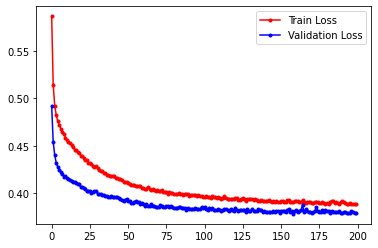

In [38]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

Looks like the losses are still going down on both the training set and the validation set.  This suggests that the model might benefit from further training.  Let's train the model a little more and see what happens. Note that it will pick up from where it left off. Train for 1000 more epochs.

In [39]:
## Note that when we call "fit" again, it picks up where it left off
run_hist_1b = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.3884 - accuracy: 0.8180 - val_loss: 0.3804 - val_accuracy: 0.8400
Epoch 2/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8247 - val_loss: 0.3792 - val_accuracy: 0.8320
Epoch 3/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8267 - val_loss: 0.3816 - val_accuracy: 0.8140
Epoch 4/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8180 - val_loss: 0.3798 - val_accuracy: 0.8160
Epoch 5/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8180 - val_loss: 0.3779 - val_accuracy: 0.8400
Epoch 6/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8253 - val_loss: 0.3824 - val_accuracy: 0.8120
Epoch 7/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.3889 - accuracy: 0.8213 - val_loss: 0.3790 - val_accuracy: 0.8400
Epoch 

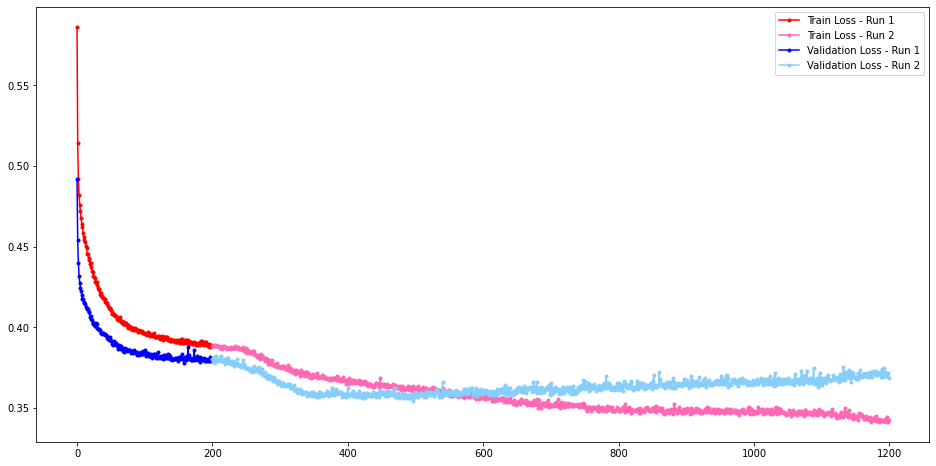

In [40]:
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax.legend()

Note that this graph begins where the other left off.  While the training loss is still going down, it looks like the validation loss has stabilized (or even gotten worse!).  This suggests that our network will not benefit from further training. 